## Método dos momentos

Igor Dias da Silva - ids3

### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definindo os parâmetros globais

In [2]:
freq = 300e6                         # frequencia f = 300 MHz
v_luz = 299792458                    # velocidade da luz em m/s
comp_onda = v_luz/freq               # comprimento de onda em m
permissividade = 8.8541878176e-12    # permissividade do vácuo
k = 2*np.pi/(comp_onda)              # número de onda
a = comp_onda*(1e-4)                 # raio da antena

### Implementação do método dos momentos

In [3]:
# m é o indice da posição da função de teste no eixo z , Zm
# n é o indice da posição da função de base no eixo z , Zn
# delta é a distancia entre Zn e Zn+1
def psi(m , n , delta):     # Como definido em aula após as aproximações
    
    psi = 0
    
    if(m == n):
#       log((delta/2 + sqrt((delta/2)**2 + a**2))/a) --> Copie e cole no wolfram para visualizar
        log = np.log((delta/2 + np.sqrt((delta/2)**2 + a**2))/a)
        psi = (1/(2*np.pi*delta))*log + (-(1j)*k/(4*np.pi))
    else:
        raiz = np.sqrt(((m-n)*delta)**2 + a**2)   #  sqrt(((m-n)*delta)**2 + a**2)
        numerador = np.e**(-(1j)*k*raiz)
        denominador = 4*np.pi*raiz
        psi = numerador/denominador
    
    return psi

In [4]:
def phi(m , n , delta):     # Como definido em aula após as aproximações
    return (psi(m - 0.5,n - 0.5,delta) - psi(m + 0.5,n - 0.5,delta) 
            - psi(m - 0.5,n + 0.5,delta) + psi(m + 0.5,n + 0.5,delta))

In [5]:
def A_mn(m , n , delta):     # Como definido em aula após as aproximações
    return (delta**2)*psi(m,n,delta)

In [6]:
def Z_mn(m , n, delta):     # Como definido em aula após as aproximações
    return (k**2)*A_mn(m,n,delta) - phi(m,n,delta)

### Calculando Z e I

In [7]:
# Z é uma matriz NxN
# I é uma matriz Nx1
# V é uma matriz Nx1
# ZxI = V

In [8]:
def calc_Z(N , delta):
#     Inicializa Z com uma matriz de zeros NxN
    Z = np.zeros( (N, N)  , dtype=complex)
#     Preenche Z usando o método dos momentos
    for m in range(0,N):
        for n in range(0,N):
            Z[m][n] = Z_mn(m,n,delta)
    
#     Pegando a matriz de impedancia verdadeira
    Z = (1j)*delta/(2*np.pi*freq*permissividade)*Z
    
    return Z

In [9]:
# Só setando V para N impar
# Todos valores são zero exceto pelo valor central
def calc_V(N):
    V = np.zeros(N , dtype=complex)          #     Inicia um vetor de N zeros
    V[np.floor(N/2).astype(int)] = 1         #     Defini o valor central como 1
    V = -(1j)*2*np.pi*freq*permissividade*V  #     Multiplica pelas constantes
    return V

In [10]:
def calc_I(Z , V):
    I = np.linalg.solve(Z, V)     # Resolve o sistema linear [Z][I] = [V]
    return I

In [11]:
def Exp(N , comp_antena):

    delta = comp_antena/(N+1)     # Comprimento dos segmentos no eixo z
    
    Z_exp = calc_Z(N , delta)     # Calcula Z , V e I
    V_exp = calc_V(N)
    I_exp = calc_I(Z_exp , V_exp)
    
    return Z_exp , V_exp , I_exp

In [12]:
# Calcula a impedancia de entrada através da tensão e corrente em z = 0
def calc_Zin(N , V , I):
    return V[np.floor(N/2).astype(int)]/I[np.floor(N/2).astype(int)]    # V[z=0]/I[z=0]

In [13]:
# Aqui N é um vetor de tamanho 6 obrigatoriamente
# Cada valor de N é uma quantidade de funções de base
# O Experimento 1 plota a distribuição da corrente 
# ao longo da antena para os diferentes quantidades de funções de base
def Experimento1(N, comp_antena):
    z_max = (comp_antena/comp_onda)/2   # A antena vai de z = -z_max a z = + z_max 
                                        # em relação ao comprimento de onda
    plot = 331   # Variável para gerenciar os subplots 
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k') #Figura onde os gráficos aparecerão

    for n in N: # Para cada quantidade de funções de base em N calcula a distribuição de corrente e plota
        Z,V,I = Exp(n , comp_antena)

        plt.subplot(plot)

        l = np.linspace(- z_max,z_max , n)

        plt.stem(l, np.absolute(I) , '-.')

        titulo = 'N = ' + str(n)
        plt.title(titulo)
        plt.xlabel('z (comp de onda)')
        plt.ylabel('Corrente')
        plot = plot + 1

    plt.show()   # mostra todas as figuras de uma vez só

In [14]:
# Este experimento plota a Impedância de Entrada vs n, com n de 1 a N (Somente para n ímpar)
def Experimento2(N,comp_antena):
    
    Zin = []
    
    for n in range(1,N,2):
        Z,V,I = Exp(n , comp_antena)
        Zin = Zin + [calc_Zin(n , V , I)]
        
    plt.stem(range(1 , N ,2) , np.real(Zin) , '-.')
    plt.xlabel('N')
    plt.ylabel('Resistência (Ohms)')
    plt.title('Resistência de entrada')
    plt.show()

### Experimentos

#### Antena de meio comprimento de onda

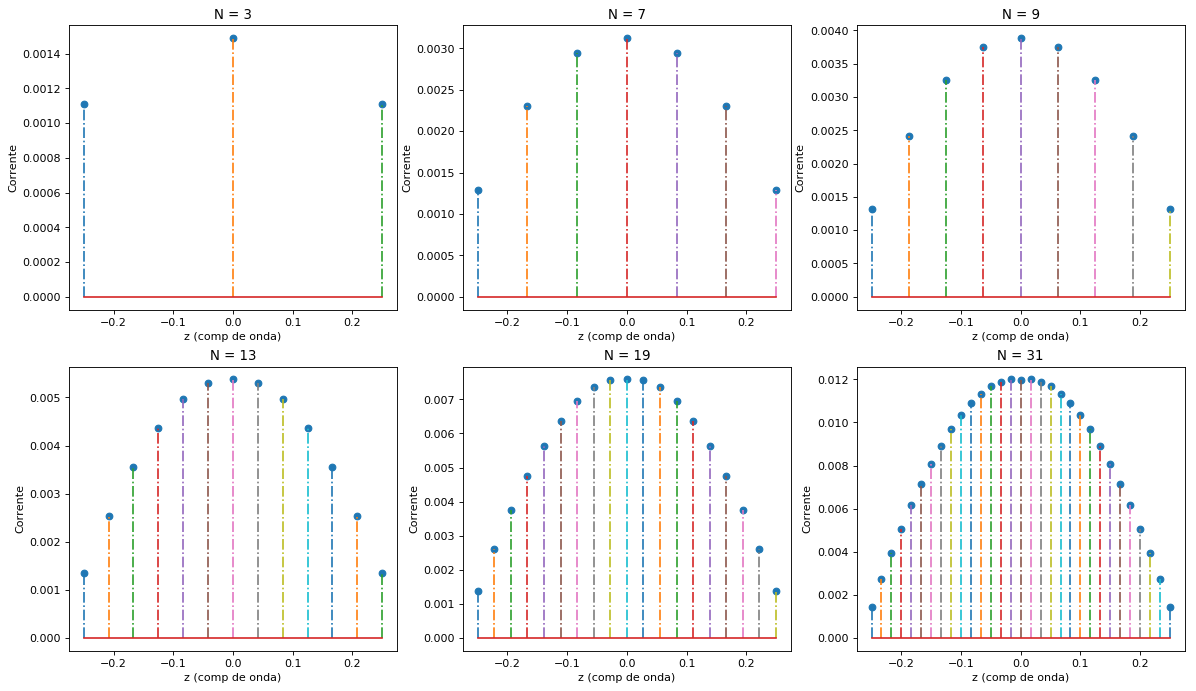

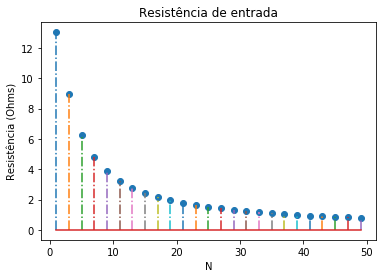

In [15]:
# Vamos testar os seguintes valores de N

N = [3 , 7 , 9 , 13 , 19  , 31]

# comprimento da antena

comp_antena = comp_onda/2

Experimento1(N , comp_antena)
Experimento2(51 , comp_antena)

#### Antena de um comprimento de onda

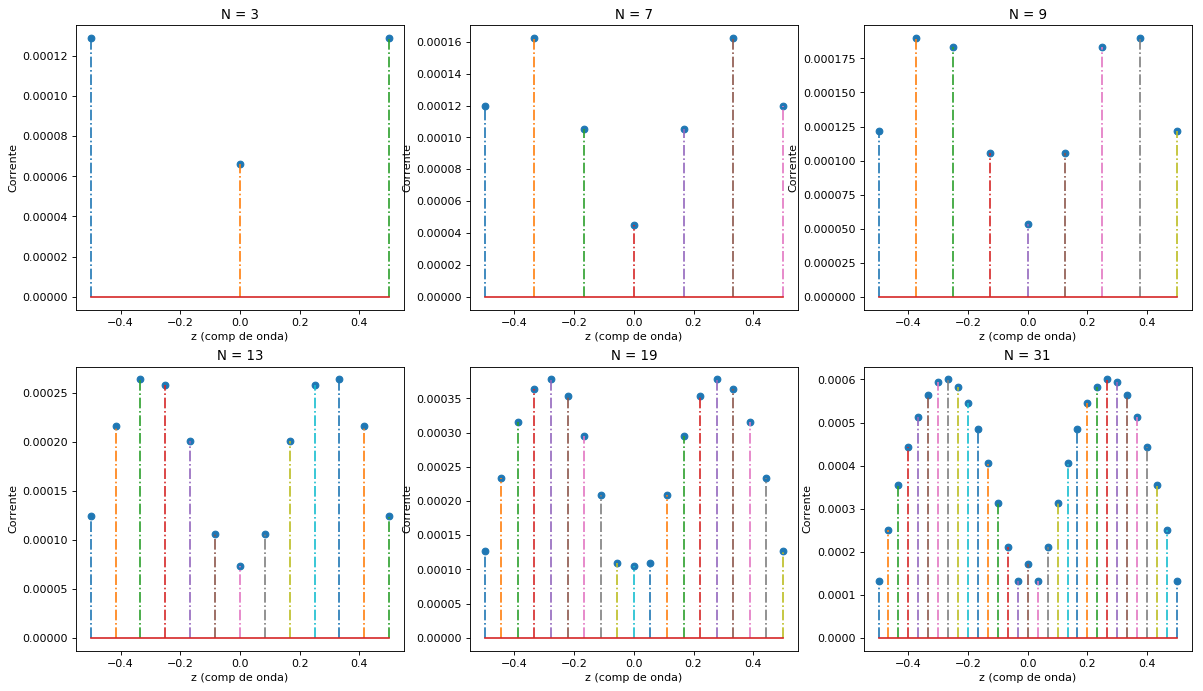

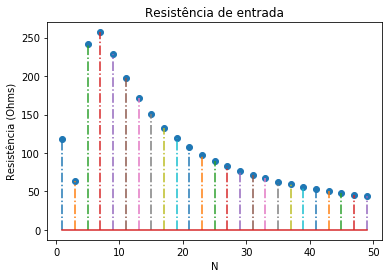

In [16]:
# Vamos testar os seguintes valores de N

N = [3 , 7 , 9 , 13 , 19  , 31]

# comprimento da antena

comp_antena = comp_onda

Experimento1(N , comp_antena)
Experimento2(51 , comp_antena)

In [17]:
# TESTE
N = 31
comp_antena = comp_onda

Z,V,I = Exp(N , comp_antena)

Zin = calc_Zin(N , V , I)

Zin

(71.51457632829437-66.2702149216671j)

In [18]:
N = 3
comp_antena = comp_onda/2
Z,V,I = Exp(N,comp_antena)
Z

array([[1.56339506-87.31238225j, 1.46552346+63.33757959j,
        1.1978956  +2.24767608j],
       [1.46552346+63.33757959j, 1.56339506-87.31238225j,
        1.46552346+63.33757959j],
       [1.1978956  +2.24767608j, 1.46552346+63.33757959j,
        1.56339506-87.31238225j]])